#### WORKING ON FLICKR30K karpathy test split

In [4]:
import pyarrow as pa
import io
from PIL import Image
import pandas as pd
import os
import os.path as osp

In [5]:
flick30k_filepath = osp.join('.', 'f30k_caption_karpathy_test.arrow')
with pa.memory_map(flick30k_filepath, 'r') as source:
    table = pa.ipc.open_file(source).read_all()

In [6]:
image_bytes = io.BytesIO(table['image'][0].as_py())
image_bytes.seek(0)
img = Image.open(image_bytes).convert("RGB")
caption = table['caption'][0][0]

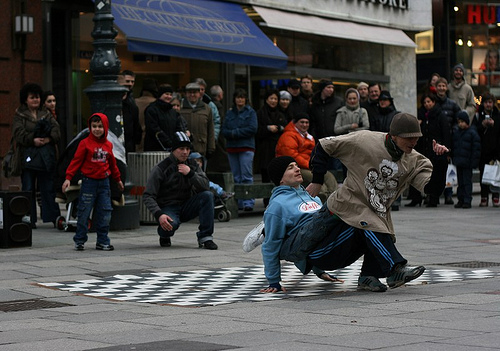

In [7]:
img

In [8]:
caption

<pyarrow.StringScalar: 'People are dancing on a checkered platform while people are watching'>

In [39]:
from transformers import BridgeTowerProcessor, BridgeTowerForImageAndTextRetrieval
import requests
from PIL import Image

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
url1 = "http://images.cocodataset.org/val2017/000000400367.jpg"
image1 =  Image.open(requests.get(url1, stream=True).raw)
texts = ["An image of two cats chilling on a couch", "A football player scoring a goal", 'street view at night']

processor = BridgeTowerProcessor.from_pretrained("BridgeTower/bridgetower-large-itm-mlm-gaudi")
model = BridgeTowerForImageAndTextRetrieval.from_pretrained("BridgeTower/bridgetower-large-itm-mlm-gaudi")

# forward pass
scores = []
for i in [image, image1]:
    sc = dict()
    for text in texts:
        # prepare inputs
        encoding = processor(i, text, return_tensors="pt")
        outputs = model(**encoding)
        sc[text] = outputs.logits[0,1].item()
    scores.append(sc)

Some weights of the model checkpoint at BridgeTower/bridgetower-large-itm-mlm-gaudi were not used when initializing BridgeTowerForImageAndTextRetrieval: ['mlm_score.decoder.weight', 'mlm_score.bias', 'mlm_score.transform.LayerNorm.weight', 'mlm_score.transform.LayerNorm.bias', 'mlm_score.transform.dense.weight', 'mlm_score.transform.dense.bias']
- This IS expected if you are initializing BridgeTowerForImageAndTextRetrieval from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BridgeTowerForImageAndTextRetrieval from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BridgeTowerForImageAndTextRetrieval were not initialized from the model checkpoint at BridgeTower/bridgetower-large-itm-mlm-gaudi a

In [33]:
scores

[{'An image of two cats chilling on a couch': 5.505379676818848,
  'A football player scoring a goal': -6.75511360168457,
  'hello how are you': -4.13508415222168},
 {'An image of two cats chilling on a couch': 5.505379676818848,
  'A football player scoring a goal': -6.75511360168457,
  'hello how are you': -4.13508415222168}]

In [40]:
scores

[{'An image of two cats chilling on a couch': 5.505379676818848,
  'A football player scoring a goal': -6.75511360168457,
  'street view at night': -6.6478590965271},
 {'An image of two cats chilling on a couch': -6.421109199523926,
  'A football player scoring a goal': -6.982781410217285,
  'street view at night': 3.26361083984375}]

In [47]:
# prepare inputs
encoding = processor(image, texts, return_tensors="pt", padding=True, truncation=True)
# outputs = model(**encoding)

In [44]:
encoding['input_ids'].size()

torch.Size([3, 11])

In [46]:
encoding['pixel_values'].size()

torch.Size([2, 3, 294, 294])

In [48]:
encoding['pixel_values'].size()

torch.Size([1, 3, 294, 294])

In [28]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-4.1784,  5.5054],
        [ 6.4833, -6.7551],
        [ 4.1269, -4.1351]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [29]:
a = outputs.logits.detach().cpu()

In [30]:
a

tensor([[-4.1784,  5.5054],
        [ 6.4833, -6.7551],
        [ 4.1269, -4.1351]])

In [69]:
b = a.argmax(dim=0)[1].numpy()

In [70]:
b = b.tolist()

In [72]:
b = [b]

In [73]:
b

[0]

In [18]:
import numpy as np
import torch
b = np.array([[1, 3], [9, 6]])

In [19]:
b = torch.tensor(b)

In [20]:
b.argmax(dim=0)

tensor([1, 1])

In [21]:
b.argmax(dim=1)

tensor([1, 0])